In [1]:
import pandas as pd
import numpy as np
import env
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

In [2]:
df = wrangle.get_zillow()

In [ ]:
df.head()

In [ ]:
df=wrangle.prep_zillow(df)

In [ ]:
df.shape

## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable

In [3]:
train, validate, test = wrangle.my_split(df)

In [4]:
train.shape, validate.shape, test.shape

((1113171, 8), (371057, 8), (371057, 8))

## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [5]:
cats = ['bedroomcnt', 'bathroomcnt',  'yearbuilt',  'fips']
nums = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']

In [33]:
def plot_variable_pairs(df):
    cats = ['bedroomcnt', 'bathroomcnt',  'yearbuilt',  'fips']
    nums = ['calculatedfinishedsquarefeet', 'taxamount', 'taxvaluedollarcnt']
    
    # make correlation plot
    train_corr = train.drop(columns=['fips','parcelid']).corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(train_corr, cmap='Purples', annot = True, mask= np.triu(train_corr), linewidth=.5)
    plt.show()
    
    sns.pairplot(train[nums].sample(1000), corner=True, kind='reg',plot_kws={'line_kws':{'color':'red'}})
    plt.show()

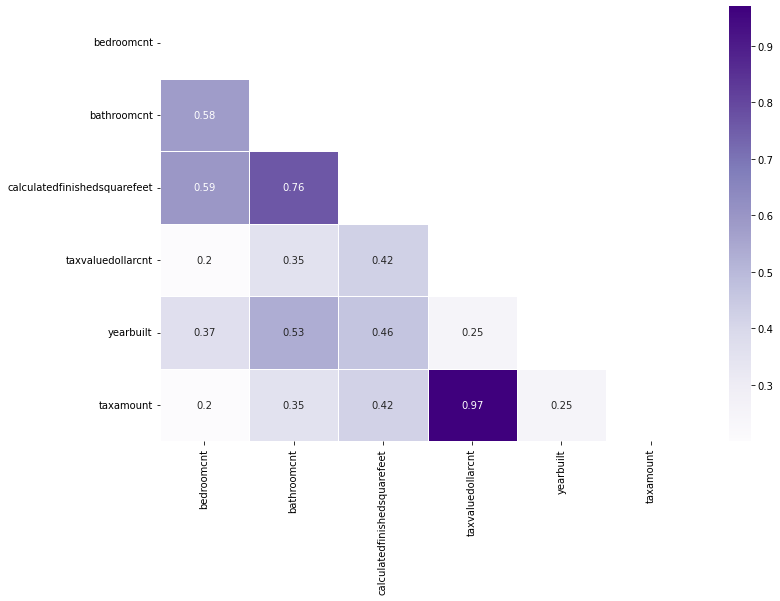

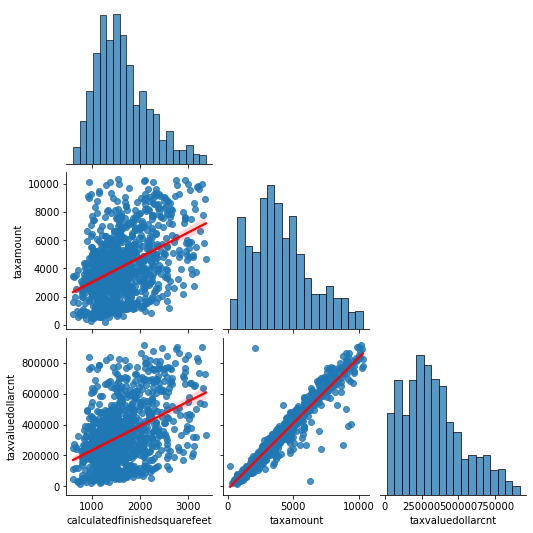

In [34]:
plot_variable_pairs(train)

In [29]:
def plot_cat_and_cont(df, cat, cont):
    sns.swarmplot(data=df.sample(100), y='taxvaluedollarcnt', x=cont, hue=cat)
    plt.show()
    
    sns.violinplot(data=df.sample(100), y='taxvaluedollarcnt', x=cont, hue=cat)
    plt.show()
    
    sns.catplot(data=df.sample(100), y='taxvaluedollarcnt', x=cont, hue=cat)
    plt.show()

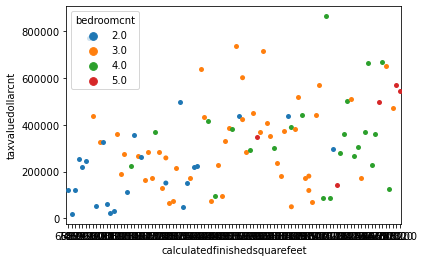

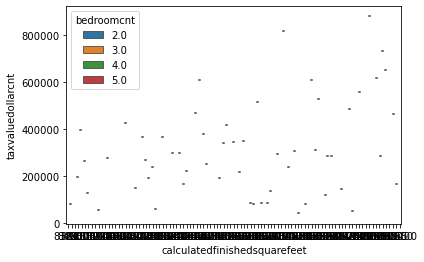

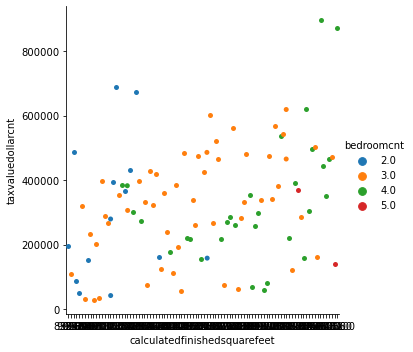

In [30]:
plot_cat_and_cont(train, cat='bedroomcnt', cont='calculatedfinishedsquarefeet')